Business problem This problem is related to Helathcare sector which is based on several feautres. We have to predict whether the given subject has heart disease or not based on the below mentioned feautres. I will be using Logisitic Regression in this case.

Data Feautres(Independent varaibles):

age - age in years
sex - (1 = male; 0 = female)
cp - chest pain type
trestbps - resting blood pressure (in mm Hg on admission to the hospital)
chol - serum cholestoral in mg/dl
fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
restecg - resting electrocardiographic results
thalach - maximum heart rate achieved
exang - exercise induced angina (1 = yes; 0 = no)
oldpeak - ST depression induced by exercise relative to rest
slope - the slope of the peak exercise ST segment
ca - number of major vessels (0-3) colored by flourosopy
thal - 3 = normal; 6 = fixed defect; 7 = reversable defect

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%pylab inline
from sklearn import *
import seaborn as sb
sb.set_style(style='darkgrid')
rcParams['figure.figsize'] = (10,8)

Populating the interactive namespace from numpy and matplotlib


In [2]:
HD = pd.read_csv("Heart.csv")
HD.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
HD.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [4]:
HD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


# Data Exploration!!

C:\PYTHON\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\PYTHON\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


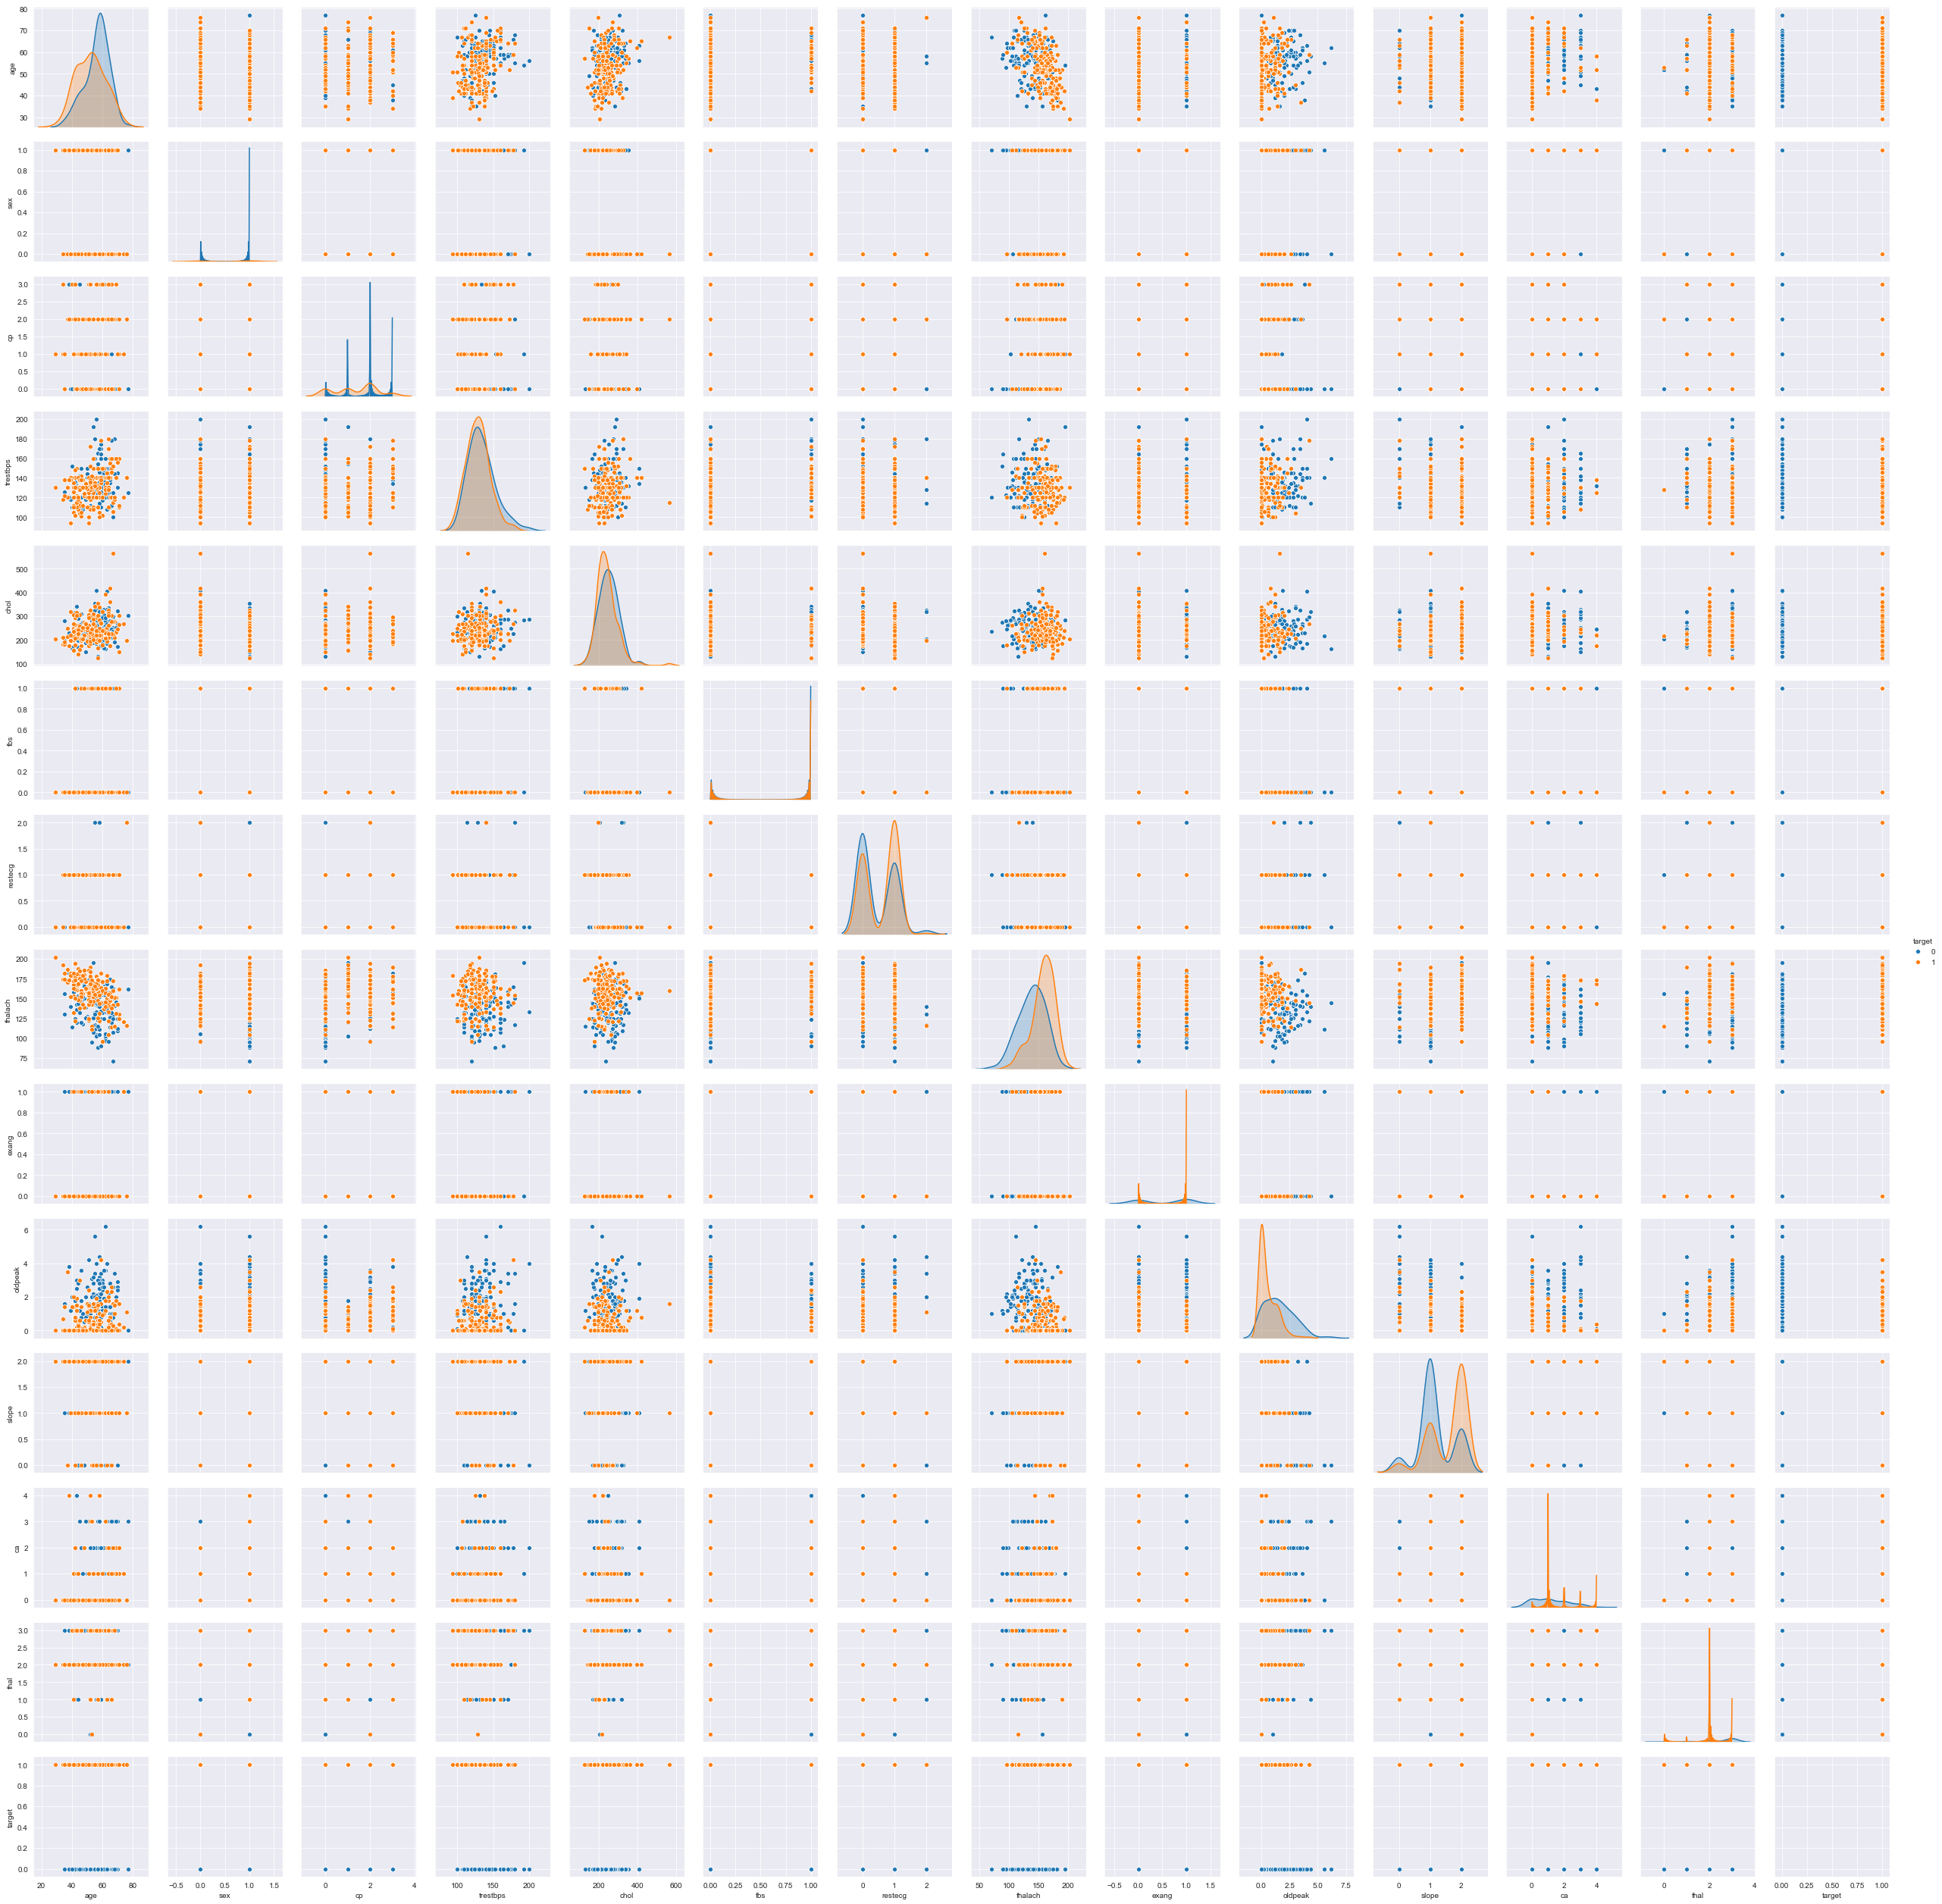

In [5]:
features = HD.columns
sb.pairplot(HD[features], hue = 'target')

In [6]:
HD.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

Text(0.5, 1.0, 'Heatmap for the numeric Features')

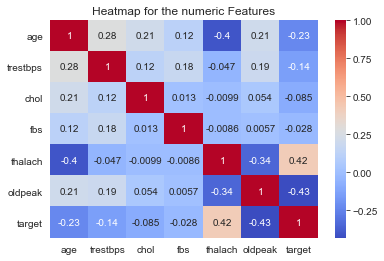

In [7]:
numeric_feature = ['age','trestbps','chol','fbs','thalach','oldpeak','target']
corr = HD[numeric_feature].corr()
sb.heatmap(corr, cmap = 'coolwarm', annot = True)
plt.title('Heatmap for the numeric Features')

1    165
0    138
Name: target, dtype: int64

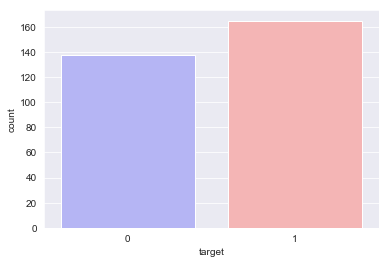

In [8]:
sb.countplot(x =  HD.target, palette="bwr")
HD.target.value_counts()

In [9]:
print('The distribution of the patient in the data is as following :')
print('% of patinet does not have heart disease is :', (138/303)*100)
print('% of patinet have heart disease is :', (165/303)*100)

The distribution of the patient in the data is as following :
% of patinet does not have heart disease is : 45.54455445544555
% of patinet have heart disease is : 54.45544554455446


1    207
0     96
Name: sex, dtype: int64

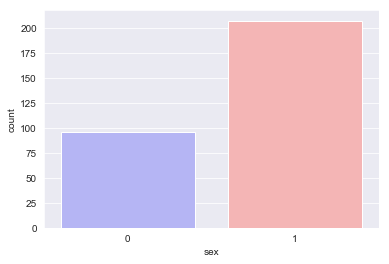

In [10]:
sb.countplot(x =  HD.sex, palette="bwr") 
HD.sex.value_counts()

In [11]:
# this command will let us know between male and female how many of them are actually suffering from the heart problem : 
print(pd.crosstab(HD.sex, HD.target)) # sex - (1 = male; 0 = female)
print('% of male heart patient :', (93/207)*100)
print('% of females heart patient :', (72/96)*100)
# We can clearly see that in our data the % of female Heart patient is wuite high. 

target    0   1
sex            
0        24  72
1       114  93
% of male heart patient : 44.927536231884055
% of females heart patient : 75.0


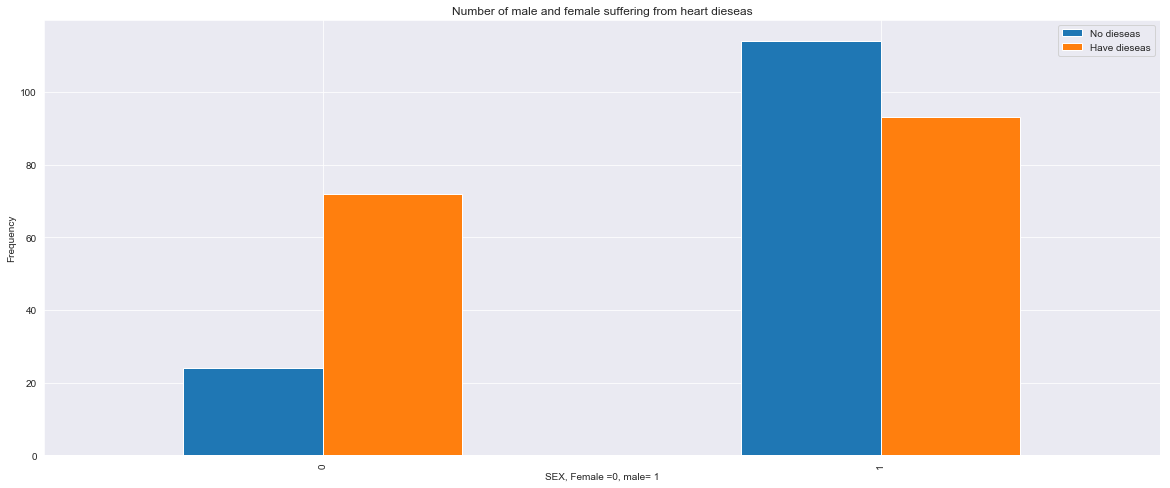

In [12]:
# Now let's visualise the disease in males and females. 
pd.crosstab(HD.sex, HD.target).plot(kind ='bar', figsize=(20,8))
plt.title('Number of male and female suffering from heart dieseas' )
plt.xlabel('SEX, Female =0, male= 1')
plt.ylabel('Frequency')
plt.legend(['No dieseas', 'Have dieseas'])

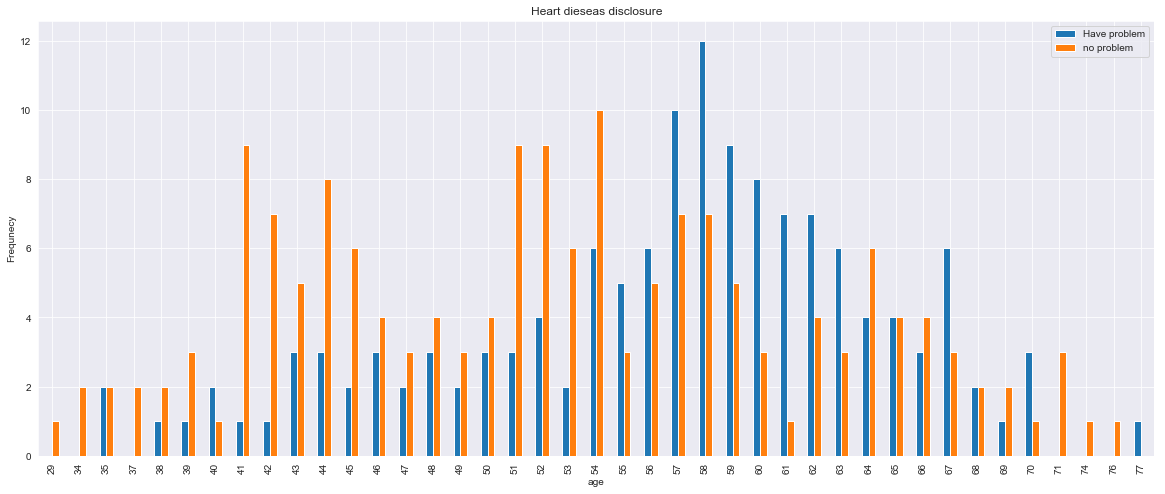

In [13]:
pd.crosstab(HD.age, HD.target).plot(kind='bar', figsize=(20,8))
plt.title('Heart dieseas disclosure')
plt.xlabel('age')
plt.ylabel('Frequnecy')
plt.legend(['Have problem','no problem'])

From the above bar plot we can see that the age group which is highly likely to suffer from heart problem is from the Age 55 to Age 63.

EDA for categorical Varaibles :


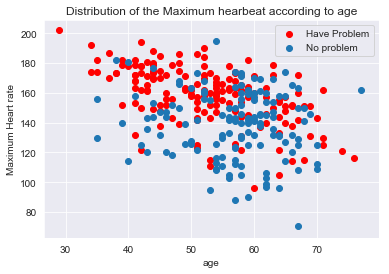

In [14]:
print(plt.scatter(x = HD.age[HD.target==1], y = HD.thalach[HD.target==1], c ='red'))
# thalach = Maximum Heart rate.
print(plt.scatter(x = HD.age[HD.target==0], y = HD.thalach[HD.target==0]))
plt.xlabel('age')
plt.ylabel('Maximum Heart rate')
plt.title('Distribution of the Maximum hearbeat according to age')
plt. legend(['Have Problem', 'No problem'])

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


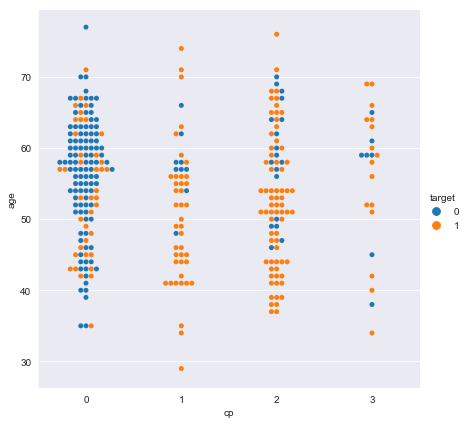

In [15]:
pd.crosstab(HD.cp, HD.target)
# As I can see in the data set the freuqnecy of chest pain in different age group. 
# sb.catplot(x='cp', y = 'age', jitter = False( This will lead to straight dotted line in the graph, data= HD)
sb.catplot(x='cp', y = 'age',kind = "swarm", hue = 'target', data= HD, height=6)
pd.crosstab(HD.cp, HD.target)

From the above catplot it is quite evident that the most of our Subjects lies in the chest pain (cp) category of - 2, therefore cp type 2 is most likely to give rise to heart disease. 

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


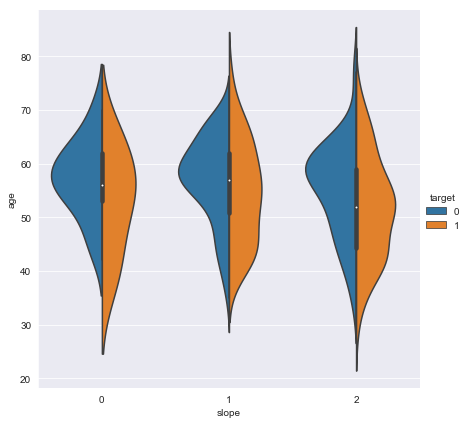

In [16]:
sb.catplot( x = 'slope', y = 'age', hue = 'target', kind = 'violin', data = HD, split = True, height= 6)
pd.crosstab(HD.slope, HD.target)

target,0,1
ca,,
0,45,130
1,44,21
2,31,7
3,17,3
4,1,4


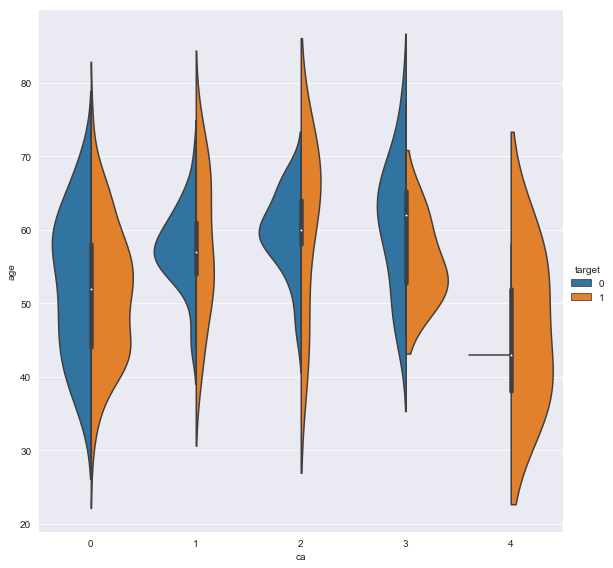

In [17]:
sb.catplot(x = 'ca', y = 'age', data = HD, kind = 'violin', hue = 'target',split = True, height=8)
pd.crosstab(HD.ca, HD.target)


As we can see in the above data ca - 0 is most likely to co-relate with the heart patient and we can see that the data is already sorted and does not have any null values in it therefore I would go forward and get the dummy varaibles for the categorical data in the dataset. 

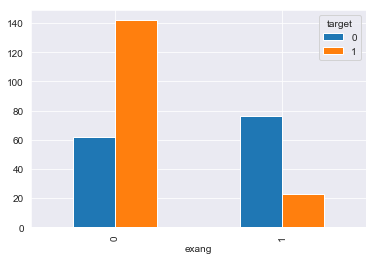

In [18]:
pd.crosstab(HD.exang, HD.target).plot(kind = 'bar')

In [19]:
HD.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

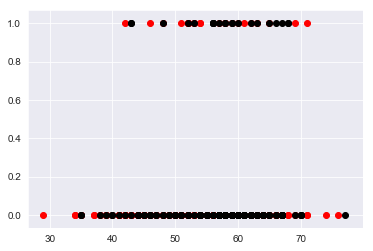

In [20]:
print(plt.scatter(x =HD.age[HD.target ==1], y = HD.fbs[HD.target==1], color = 'red'))
print(plt.scatter(x = HD.age[HD.target==0], y = HD.fbs[HD.target==0], color = 'black'))

In [21]:
HD.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Text(0.5, 1.0, 'Relationship b/w the oldpeak along with the Age')


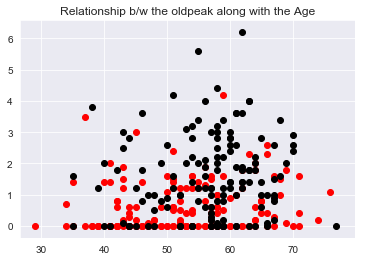

In [22]:
print(plt.scatter(x = HD.age[HD.target==1], y = HD.oldpeak[HD.target ==1], color = 'red'))
print(plt.scatter(x = HD.age[HD.target ==0], y = HD.oldpeak[HD.target ==0], color = 'black'))
print(plt.title('Relationship b/w the oldpeak along with the Age'))

Choosing the independent and dependent variables in thw data. 

In [23]:
HD.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [24]:
x = HD.drop(['target'],1)
y = HD.target

Train-Test split of the data. 

In [25]:
x_train,x_test,y_train, y_test = model_selection.train_test_split(x,y, test_size = 0.2, random_state= 0)
print(x_train.shape,y_train.shape, x_test.shape, y_test.shape)


(242, 13) (242,) (61, 13) (61,)


Algorithms I am going to use in this dataset. 
1) Logisitic Regression. 
2) KNN( K nearesr neighbours) 
3) DT ( Decision tree)

# LOGISTIC REGRESSION : 

In [26]:
# fitting the training data into the algo. 
lg = linear_model.LogisticRegression()
lg.fit(x_train, y_train)

C:\PYTHON\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [27]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score, roc_curve, auc, roc_auc_score

In [28]:
lg_pred = lg.predict(x_test)
a = lg.score(x_train, y_train)
b = lg.score(x_test, y_test)
print('The score for the Training set is : ', a)
print('The score for the Test set is : ', b)

The score for the Training set is :  0.8471074380165289
The score for the Test set is :  0.8524590163934426


In [29]:
    conf = metrics.confusion_matrix(y_test,lg_pred)
    print('The confusion metrics for the above dataset is:',conf)

The confusion metrics for the above dataset is: [[22  5]
 [ 4 30]]


In [30]:
precision = metrics.precision_score(y_test,lg_pred)
f1 = metrics.f1_score(y_test,lg_pred)
recall = metrics.recall_score(y_test,lg_pred)
auc_score = metrics.roc_auc_score(y_test,lg_pred)
print('The precison is:', precision)
print('F1 score is :', f1)
print('The recall is :', recall)
print('The auc_score is :', auc_score)



The precison is: 0.8571428571428571
F1 score is : 0.8695652173913043
The recall is : 0.8823529411764706
The auc_score is : 0.8485838779956427


# ROC Curve (LR)

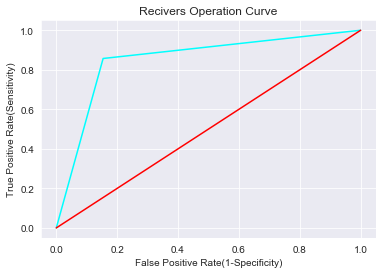

The AUC(area under the curve) is :  0.8485838779956427


In [31]:
reciver_curve = roc_curve(lg_pred,y_test)
false_positive_rate, true_positive_rate, threshold = reciver_curve
plt.plot(false_positive_rate,true_positive_rate, color = 'cyan')
plt.title('Recivers Operation Curve')
plt.plot([0,1],[0,1], color ='red')     
plt.ylabel('True Positive Rate(Sensitivity)')
plt.xlabel('False Positive Rate(1-Specificity)')
plt.show()
print('The AUC(area under the curve) is : ',auc_score)



    ROC (Reciever Operating Charecteristic) curve

    It is a plot of the true positive rate against the false positive rate for the different possible cutpoints of a diagnostic test.

    An ROC curve demonstrates several things:

    1) It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).

    2) The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.

    3)The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

    4) The area under the curve is a measure of test accuracy.


 Conclusion : The Logisitic algo fit is quite decent in the data with good accuracies overall, however I will seek for more accuracy in the data and will see whether other algorithms can outrun the perfomance metrics of the Logisitc Regression.
Going forward I will use 'Decision Tree' to classify the data : 

# Decision Treee

In [32]:
from graphviz import Source
from IPython import *

In [49]:
dt = tree.DecisionTreeClassifier(max_depth = 4, max_features = 13, max_leaf_nodes = 8)
model_dt = dt.fit(x_train,y_train)
predictions = dt.predict(x_test)


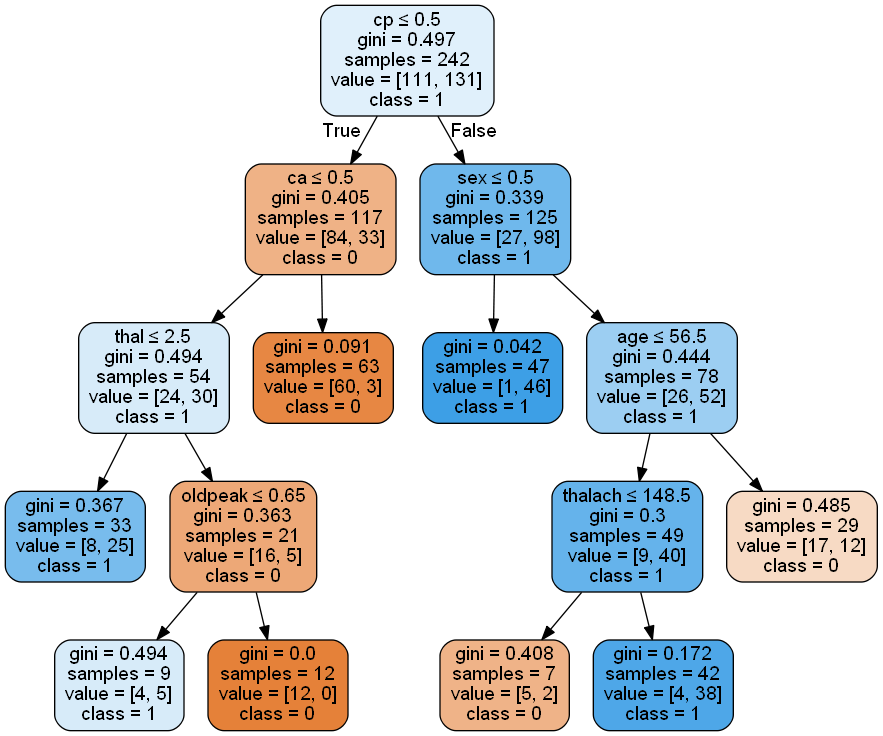

In [50]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(dt, out_file= dot_data, filled=True, rounded=True,
                special_characters=True,feature_names = x_train.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('HD-1.png')
Image(graph.create_png())

In [57]:
s1 = model_dt.score(x_test,y_test)
print('The score for the test data is :', s1)

The score for the test data is : 0.7540983606557377


In [58]:
metrics.confusion_matrix(y_test,predictions)

array([[22,  5],
       [10, 24]], dtype=int64)

In [60]:
accuracy = metrics.accuracy_score(y_test, predictions)
recall = metrics.recall_score(y_test,predictions)
precision = metrics.precision_score(y_test,predictions)

In [71]:
s_card = {'Accuracy' : accuracy, 'Recall': recall,'Precison': precision}
pd.Series(s_card)

Accuracy    0.754098
Recall      0.705882
Precison    0.827586
dtype: float64

# RANDOM FOREST:

In [36]:
from sklearn.ensemble import RandomForestClassifier

In [122]:
rf = RandomForestClassifier(n_estimators = 800)
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
R_predict = rf.predict(x_test)

C:\PYTHON\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [123]:
R_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1], dtype=int64)

In [124]:
# Score 
S1 = rf.score(x_train,y_train)
S2 = rf.score(x_test,y_test)
print('The score for the training data is :', S1)
# As we can see the random forest fits completely well in the training data.
print('The score for the test data under RF algo is :', S2)

The score for the training data is : 0.9834710743801653
The score for the test data under RF algo is : 0.8360655737704918


In [125]:
print('The accuracy score is ', metrics.accuracy_score(y_test,R_predict))

The accuracy score is  0.8360655737704918


In [126]:
metrics.confusion_matrix(y_test,R_predict)

array([[24,  3],
       [ 7, 27]], dtype=int64)

As I can see the Decision tree also gives a decent fit to classify the data, however I would go further and use K Nearest Mean: 
K Nearest Mean : 

In [ ]:
roc = roc_curve(predictions, y_test)
false_positive_rate, true_positive_rate, threshold = roc
plt.plot([0,1],[0,1], color = 'black')
plt.plot(false_positive_rate, true_positive_rate, color = 'cyan')
plt.title('Decision Tree ROC curve')
plt.xlabel('False positive rate (1 - Specificity)')
plt.ylabel('True Positive rate (Sensitivity)')
r_score = roc_auc_score(predictions, y_test)
print('The ROC score for the data is : ', r_score)
# as we can see the Area under the ROC curve is quite high for our test data approximately 97%. 
# As I can see the model is giving me quite high accuracy, perhaps this might be the case of the overfitting. 
# therefore I will dive down in the data to see whtether the data is plagued with overfitting or not. 

# K- Nearest Neighbors. 

In [ ]:
# importing the library into the notebook 
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
neighbors = np.arange(1,10)
# setting p the empty arrays for training and test accuracies. 
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k) # creating the algorithm. 
    knn.fit(x_train,y_train)
    train_accuracy[i] = knn.score(x_train,y_train)
    test_accuracy[i] = knn.score(x_test,y_test)
    

In [ ]:
plt.title('K Neighbors with highest accuracy')
plt.plot(neighbors,train_accuracy, color = 'red')
plt.plot(neighbors, test_accuracy, color = 'black')
plt.xlabel('No. of Neighbors')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'])


As I can see the best neighbors to fit accuracy the KNN model is churning out when the Neighbors are 8. 
Therefore I will be setting up the neighbors as 7. 

In [ ]:
# Now with the help of the graph we can set different values for the K and check the accuracy for the same. 
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(x_train, y_train)
K_pred = knn.predict(x_test)
K_score = knn.score(x_train, y_train), knn.score(x_test,y_test)
print('The score under the K Nearest Neighbors algorithm is:', K_score)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
report = classification_report(y_test,K_pred)
print(report)

In [ ]:
S_roc = roc_auc_score(K_pred,y_test)
S_roc

In [ ]:
# Predciting the probability. 
y_prob = knn.predict_proba(x_test)[:,1]

# ROC curve(KNN)

In [ ]:
false_positive_rate, true_positive_rate, threshold = roc_curve(K_pred,y_test)
plt.plot([0,1],[0,1])
plt.plot(false_positive_rate,true_positive_rate, color= 'red')
plt.title('ROC curve for KNN algo')
plt.xlabel('False Positive Rate(1 - specificity)')
plt.ylabel('True Positive Rate(sensitivity)')
print('The Are under the curve is :', S_roc)

# Conclusion 
As we can see that among the above done algorithm the best algorithm so farr is the Decision Tree with the highest acuracy upto 96% on the test data, however we can see that on the train data has been lower, thus the Dt manages to pull out the trend more clearly followed by Logistic Regression and KNN. 